# Homework 2  (Due: 10/17/2018)

COEN 281, Fall 2018  
Professor Marwah

---
The objective of this HW is to implement k-NN and cross-validation to find the best value of  kk  for a binary classification task. The task to diagnose breast cancer based on 30 numeric features. However, to keep things simple, we will only use two of those features. The output is binary: 0 benign, 1 malignant. In all there are 569 examples, which we will split into training and test sets. There are no missing values.

In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

   
#loading, printing statistics for the data 
dat = sklearn.datasets.load_breast_cancer()
print(dat.DESCR)
dat.keys()
dat.values()
ix1 = np.where(dat["feature_names"] == "mean area")[0][0]
ix2 = np.where(dat["feature_names"] == "mean concave points")[0][0]

X = dat["data"][:,(ix1,ix2)]
Y = dat["target"]

# verify shape of X and Y
print(X.shape, Y.shape)

# stats of the two features
from scipy import stats
st = stats.describe(X)
print("Number of points: %i" % st.nobs)
print("range (min, max), X1: (%.2f, %.2f), X2: (%.2f, %.2f)" % (st.minmax[0][0], st.minmax[1][0], st.minmax[0][1], st.minmax[1][1]))
print("mean: %.2f, %.2f" % (st.mean[0], st.mean[1]))
print("variance: %.2f, %f" % (st.variance[0], st.variance[1]))

#code to normalize the data
for i in range(len(X)):
    X[:,0][i]= (X[:,0][i]-st.minmax[0][0]) / (st.minmax[1][0]-st.minmax[0][0])
    X[:,1][i]=(X[:,1][i]-st.minmax[0][1])/(st.minmax[1][1]-st.minmax[0][1])
    
# split into training set / test set
nTot = X.shape[0]
nTr = int(nTot*0.7)
nTs = nTot - nTr

Xtr = X[0:nTr,]
Ytr = Y[0:nTr]

Xts = X[nTr:nTot,]
Yts = Y[nTr:nTot,]


# verify shapes
print(Xtr.shape, Ytr.shape, Xts.shape, Yts.shape)

    

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

It is a good idea to normalize the features because after that all the data values will be mapped into a single scale. All the values are between zero and one, which helps to eliminate overestimation of any single given feature. 

k-NN Implementation

Problem 1 (30 points): Fill-in code for normalizing features, to implement k-NN.

In [7]:
#computes distance matrix part of problem 1
def compute_dist_mat(Xts, Xtr):    
    # use two for loops to compute the matrix
    i=int(0)
    j=int(0)
    M=np.ones((len(Xts),len(Xtr)))
    for i in range(len(Xts)):
        for j in range(len(Xtr)):
            M[i,j]=np.sqrt(np.power((Xts[i,1]-Xtr[j,1]),2)+ np.power((Xts[i,0]-Xtr[j,0]),2))            
    return M         

#computes knn part of problem 1    
def knn_predict(Xtr, Ytr, Xts, k):
    dist = compute_dist_mat(Xts, Xtr)
    out=[]
    for i in range(len(Xts)):
        k_small=np.argpartition(dist[i,:],k)[:k]
        count_zero=int(0)
        count_one=int(0)

        for j in k_small:
            index=Ytr[j]
            if(index==0):
                count_zero+=1
            elif(index==1):
                count_one+=1
        if(count_zero>count_one):
            out.append(0)
        elif(count_one>count_zero):
            out.append(1)
            
    return out     

#part of problem 2
#metrics 
def accuracy_metrics(y_pred,Yts):
    a=b=c=d=0
    i=int(0)
    for i in range(len(y_pred)):
        if(y_pred[i]==1):
            if(Yts[i]==1):
                a+=1
            elif (Yts[i]==0):
                c+=1
        elif(y_pred[i]==0):
            if(Yts[i]==1):
                b+=1
            elif(Yts[i]==0):
                d+=1
    return a,b,c,d

  

Problem 2 (20 points): Run your k-NN implementation on the test data set. Use k=5. Compute accuracy, recall and precision of the test data set (do not use python library functions to compute these). 

In [8]:

#problem 2 run knn with k=5
y_pred=knn_predict(Xtr, Ytr, Xts, 5)
#metrics calculation    
a,b,c,d=accuracy_metrics(y_pred,Yts)
print('accuracy is %0.3f' %(((a+d)/(a+b+c+d))*100))
print('precision is %0.3f' %((a/(a+c))*100))
print('recall is %0.3f' %( (a/(a+b))*100))


accuracy is 91.228
precision is 99.160
recall is 89.394


Cross-Validation
Priblem 3 (30 points): Now we will implement 5-fold cross-validation to find the best value of  kk . And then using that value of  kk , re-run k-NN on the test data set. (This is adapted from a past Stanford cs231n assignment)

k = 1, accuracy = 78.750000
k = 1, accuracy = 78.750000
k = 1, accuracy = 87.500000
k = 1, accuracy = 87.341772
k = 1, accuracy = 89.873418
k = 3, accuracy = 78.750000
k = 3, accuracy = 81.250000
k = 3, accuracy = 88.750000
k = 3, accuracy = 91.139241
k = 3, accuracy = 88.607595
k = 5, accuracy = 82.500000
k = 5, accuracy = 83.750000
k = 5, accuracy = 90.000000
k = 5, accuracy = 93.670886
k = 5, accuracy = 91.139241
k = 7, accuracy = 83.750000
k = 7, accuracy = 83.750000
k = 7, accuracy = 87.500000
k = 7, accuracy = 94.936709
k = 7, accuracy = 92.405063
k = 9, accuracy = 85.000000
k = 9, accuracy = 83.750000
k = 9, accuracy = 90.000000
k = 9, accuracy = 92.405063
k = 9, accuracy = 93.670886
k = 11, accuracy = 85.000000
k = 11, accuracy = 82.500000
k = 11, accuracy = 91.250000
k = 11, accuracy = 92.405063
k = 11, accuracy = 93.670886
k = 13, accuracy = 88.750000
k = 13, accuracy = 82.500000
k = 13, accuracy = 91.250000
k = 13, accuracy = 92.405063
k = 13, accuracy = 91.139241
k = 15, ac

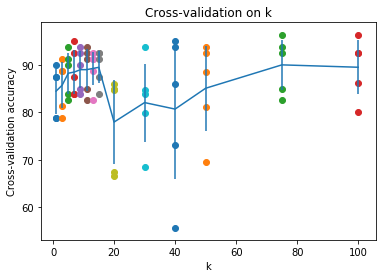

In [9]:
#cross validation
num_folds = 5
k_choices = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 75, 100]

#splitting the data sets
X_train_folds=np.array_split(Xtr,num_folds)
y_train_folds=np.array_split(Ytr,num_folds)
k_to_accuracies = {}

#performing k-fold cross validation
i=int(0)
for i in k_choices:
    accuracy_list=[]
    for j in range(num_folds):
        train_X=np.concatenate([X_train_folds[i] for i in range(5) if i!=j])
        train_Y=np.concatenate([y_train_folds[i] for i in range(5) if i!=j])
        y_new=knn_predict(train_X,train_Y, X_train_folds[j],i)
        a,b,c,d=accuracy_metrics(y_new,y_train_folds[j])
        accuracy_list.append(((a+d)/(a+b+c+d))*100)
    k_to_accuracies[i]=accuracy_list

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]: 
        print('k = %d, accuracy = %f' % (k, accuracy))
                
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()



Problem 4 (20 points): Based on the cross-validation results above, choose the best value for $k$. Repeat problem 2 with this $k$ (using the entire training data set).

In [11]:
#choosing the best value of k 
for m in k_choices:
    y_pred=knn_predict(Xtr, Ytr, Xts, m)
    a,b,c,d=accuracy_metrics(y_pred,Yts)
    print('accuracy with %d is %0.3f' %( m, (((a+d)/(a+b+c+d))*100)))

 
#trying problem 2 with this new best value k=100
y_pred=knn_predict(Xtr, Ytr, Xts, 100)
a,b,c,d=accuracy_metrics(y_pred,Yts)
print('accuracy with %d is %0.3f' %( 100, (((a+d)/(a+b+c+d))*100)))
print('precision is %0.3f' %((a/(a+c))*100))
print('recall is %0.3f' %((a/(a+b))*100 ))

accuracy with 1 is 92.982
accuracy with 3 is 89.474
accuracy with 5 is 91.228
accuracy with 7 is 92.398
accuracy with 9 is 92.398
accuracy with 11 is 91.813
accuracy with 13 is 91.813
accuracy with 15 is 91.813
accuracy with 20 is 67.665
accuracy with 30 is 91.813
accuracy with 40 is 81.657
accuracy with 50 is 92.398
accuracy with 75 is 92.982
accuracy with 100 is 94.737
accuracy with 100 is 94.737
precision is 97.674
recall is 95.455


Extra Credit Problem 2 (5 points): In problem 1 above, re-write the compute_dist_mat() function with no loops. That may seem non-intuitive, but it is possible to compute the L2 distances using matrix operations (matrix multiplication, addition, etc.) without explicitly doing the double for loop. The advantage of using matrix operations is that they are highly optimized and enable "vectorization", and for such computations can give 10-100x speed improvements.

In [6]:
#extra credit problem 2
def compute_dist_mat_1(Xts, Xtr):            
    aSquare = np.sum(np.square(Xtr),axis=1);
    bSquare = np.sum(np.square(Xts),axis=1);
    ab = np.dot(Xts,Xtr.T);
    return np.sqrt(aSquare+bSquare[:,np.newaxis]-2*ab)